# Week 8 - Clothes Classification using Deep Learning
## Tensorflow & Keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

2022-11-22 14:13:49.038043: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


'2.9.1'

In [5]:
from tensorflow.keras.preprocessing.image import load_img

In [6]:
path = "./clothing-dataset-small/train/shirt/"
name = "028f8beb-150d-41a9-bb4e-3de383c7856e.jpg"

full_path = path + name

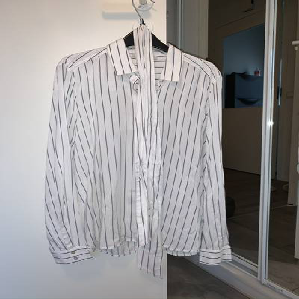

In [7]:
img = load_img(full_path, target_size=(299, 299))
img

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F4CA9C03580>


In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-Trained Convolutional Neural Networks

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-22 14:13:55.143087: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:13:55.182945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:13:55.183572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-22 14:13:55.184531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
X = np.array([x])
X = preprocess_input(X)
X.shape

(1, 299, 299, 3)

In [13]:
preds = model.predict(X)
preds.shape

2022-11-22 14:13:58.779976: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-22 14:13:59.984516: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:13:59.985649: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:13:59.985703: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-22 14:13:59.986709: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-22 14:13:59.986796: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 4s 4s/step


(1, 1000)

In [15]:
decode_predictions(preds)

[[('n03877472', 'pajama', 0.6629665),
  ('n04350905', 'suit', 0.1228166),
  ('n03630383', 'lab_coat', 0.035888422),
  ('n04591157', 'Windsor_tie', 0.012373595),
  ('n04367480', 'swab', 0.009408309)]]

## Transfer Learning

In transfer learning, we will keep bottom layer of pretrained model that is the convolutinal layer to create a verctorizational input and we will create new top dense layer for the pretrained model `Xception` to trained our model according to given datavalues and labels.

In [16]:
# Read data with ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [17]:
# Read from directory
train_df = img_gen.flow_from_directory("./clothing-dataset-small/train",
                           target_size=(150, 150),
                           batch_size=32
                           )

Found 3068 images belonging to 10 classes.


In [18]:
# class lables dictionary with indecies
train_df.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [19]:
# To view next batch
X, y = next(train_df)

In [20]:
# Input images
X.shape

(32, 150, 150, 3)

In [21]:
# target variables y 
y.shape

(32, 10)

In [22]:
# target variable representation (Multi-class classfication)
# Returns arrays of 0's and 1's
# Since the there are 10 class labels, each rows represent an array of size 10, 
# representing 1 for True class of that instance while 0's for Flase classes as in class-dictionary shown above.
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
# For validation data
val_df = img_gen.flow_from_directory("./clothing-dataset-small/validation",
                           target_size=(150, 150),
                           batch_size=32,
                           shuffle=False
                           )

Found 341 images belonging to 10 classes.


In [24]:
# Create a base model using pre-trained model (Xception)
base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3))

base_model.trainable = False   # Don't change the convolutional layer

In [25]:

inputs = keras.Input(shape=(150, 150, 3))                        # To instantiate a Keras tensor.

base = base_model(inputs, training=False)                         # Produced 4D outputs

vectors = keras.layers.GlobalAveragePooling2D()(base)            # To reduced the size of base output in 2D

outputs = keras.layers.Dense(10)(vectors)                        # Add dense layer to produce output with 10 classes

model = keras.Model(inputs, outputs)

In [26]:
preds = model.predict(X)
print(preds.shape)
print(preds[0])

1/1 [==============================] - 1s 1s/step
(32, 10)
[ 0.8489722  -0.16507292  0.09796974 -0.6126442  -0.19018444  0.0182004
 -0.24224652 -0.22523072 -0.3606805   0.43564415]


In [27]:
# Configuration
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)            # Built-in optimizer
loss = keras.losses.CategoricalCrossentropy(from_logits=True)             # Built-in loss function


# configure the model for training
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# model training using fixed number of epochs(iterations on a dataset)
# Epochs - One epoch is an iteration over the entire provided data including both X and y.
model_hist = model.fit(train_df, epochs=10, validation_data=val_df)

Epoch 1/10
96/96 [==============================] - 18s 161ms/step - loss: 1.2231 - accuracy: 0.6780 - val_loss: 1.1542 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5384 - accuracy: 0.8282 - val_loss: 0.8911 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3777 - accuracy: 0.8739 - val_loss: 0.8594 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.2152 - accuracy: 0.9254 - val_loss: 0.9442 - val_accuracy: 0.7801
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1564 - accuracy: 0.9456 - val_loss: 0.8525 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1112 - accuracy: 0.9625 - val_loss: 0.9481 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1034 - accuracy: 0.9625 - val_loss: 0.9242 - val_accuracy: 0.7889

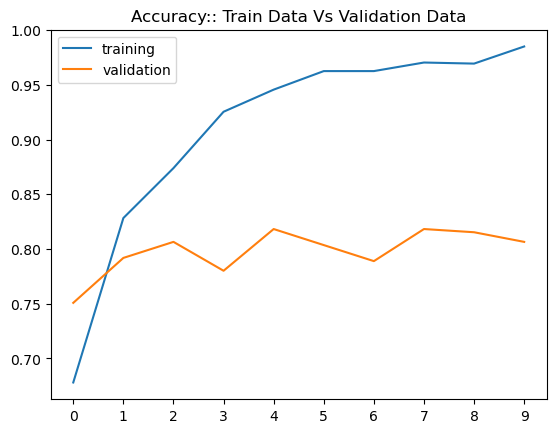

In [28]:
# plot the accuracy results
plt.plot(model_hist.history['accuracy'], label="training")
plt.plot(model_hist.history['val_accuracy'], label="validation")

plt.title("Accuracy:: Train Data Vs Validation Data")
plt.xticks(np.arange(10))

plt.legend()
plt.show()

In [29]:
def make_model(learning_rate=0.01):
    # base model
    base_model = Xception(weights="imagenet",
                     include_top=False,
                     input_shape=(150, 150, 3))

    base_model.trainable = False 
    
    # ---------------x-x-x-x-----------
    # Model architechture
    inputs = keras.Input(shape=(150, 150, 3))                        
    base = base_model(inputs, training=False)                         
    vectors = keras.layers.GlobalAveragePooling2D()(base)            
    outputs = keras.layers.Dense(10)(vectors)                        
    model = keras.Model(inputs, outputs)
    
    # ---------------x-x-x-x-----------
    # Model training
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)            
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [30]:
# Learning rate tunning - To find a optimum learning rate value
scores = {}
for alpha in [0.001, 0.01, 0.1]:
    print(f"---------{alpha}---------")
    model = make_model(learning_rate=alpha)
    model_hist = model.fit(train_df, epochs=10, validation_data=val_df)
    scores[alpha] = model_hist.history
    print()
    print()

---------0.001---------
Epoch 1/10
96/96 [==============================] - 15s 130ms/step - loss: 1.1078 - accuracy: 0.6209 - val_loss: 0.7335 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 12s 121ms/step - loss: 0.6410 - accuracy: 0.7819 - val_loss: 0.6255 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5168 - accuracy: 0.8308 - val_loss: 0.5850 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.4356 - accuracy: 0.8592 - val_loss: 0.5658 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3815 - accuracy: 0.8820 - val_loss: 0.5657 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3323 - accuracy: 0.9035 - val_loss: 0.5536 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.2965 - accuracy: 0.9188 - val_loss: 0.534

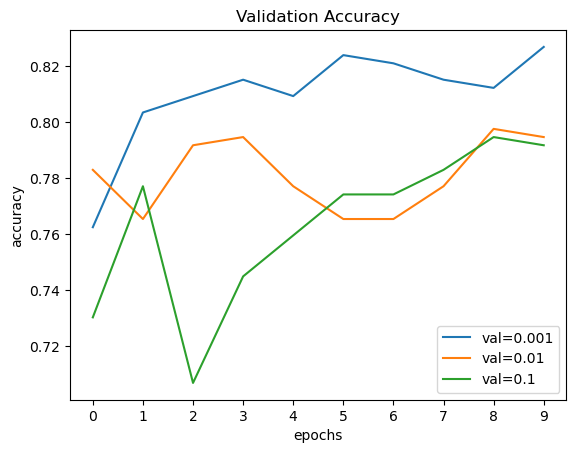

In [31]:
for alpha, model in scores.items():
#     plt.plot(model['accuracy'], label="train=%s" %alpha)
    plt.plot(model['val_accuracy'], label="val=%s" %alpha)
    plt.legend()

    
plt.title("Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.xticks(np.arange(10))
plt.show()

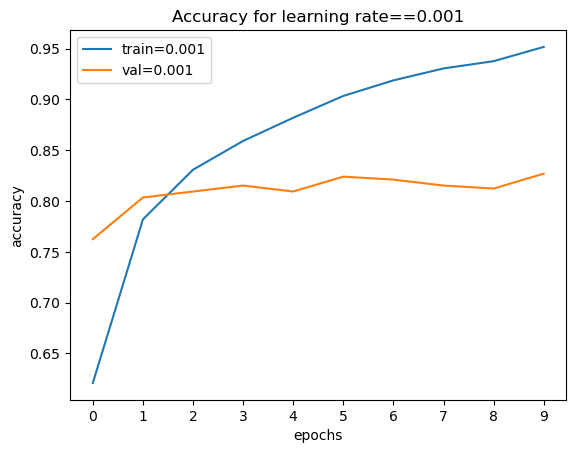

In [36]:
plt.plot(scores[0.001]['accuracy'], label="train=0.001")
plt.plot(scores[0.001]['val_accuracy'], label="val=0.001")

plt.title("Accuracy for learning rate==0.001")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.xticks(np.arange(10))
plt.legend()

plt.show()

## Checkpointing
Checkpointing is saving a model after each iteration for certain conditions. For example saving a best model for a particular epoch that performs well compare to the model performance at the end of all iterations.

In [37]:
# Format to save model in Nural Networks (h5 binary format) 
# for example:: `model.save_weights("saved_model_file_name.h5", save_format='h5')`

checkpoints = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [38]:
# Find a best model using best learning rate from above.
learning_rate = 0.001
model = make_model(learning_rate=learning_rate)
model_hist = model.fit(train_df, 
                       epochs=10,
                       validation_data=val_df,
                       callbacks=[checkpoints]
                      )

Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 0.9579 - accuracy: 0.6789 - val_loss: 0.6930 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 12s 126ms/step - loss: 0.5028 - accuracy: 0.8168 - val_loss: 0.6569 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3528 - accuracy: 0.8827 - val_loss: 0.6211 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 12s 126ms/step - loss: 0.2394 - accuracy: 0.9309 - val_loss: 0.5701 - val_accuracy: 0.8211
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.1699 - accuracy: 0.9580 - val_loss: 0.5749 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 12s 123ms/step - loss: 0.1155 - accuracy: 0.9775 - val_loss: 0.5814 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 123ms/step - loss: 0.0810 - accuracy: 0.9876 - val_loss: 0.5916 - val_accuracy: 0.8182

## Adding More Layers

Add one inner dense layer

In [39]:
def make_model(learning_rate=0.01, size_inner=100):
    # base model
    base_model = Xception(weights="imagenet",
                          include_top=False,
                          input_shape=(150, 150, 3)
                         )

    base_model.trainable = False 
    
    # ---------------x-x-x-x-----------
    # Model architechture
    inputs = keras.Input(shape=(150, 150, 3))                        
    base = base_model(inputs, training=False)                         
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # add inner dense layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)                        
    model = keras.Model(inputs, outputs)
    
    # ---------------x-x-x-x-----------
    # Model training
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)            
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [40]:
# Tunning a inner layer size.
learning_rate = 0.001                 # Best learning rate
scores = {}
for size in [10, 100, 1000]:
    print(f"---------{size}---------")
    model = make_model(learning_rate=learning_rate, size_inner=size)
    model_hist = model.fit(train_df, 
                           epochs=10, 
                           validation_data=val_df
                          )
    scores[size] = model_hist.history
    print()
    print()

---------10---------
Epoch 1/10
96/96 [==============================] - 15s 131ms/step - loss: 1.4133 - accuracy: 0.5362 - val_loss: 0.9732 - val_accuracy: 0.7067
Epoch 2/10
96/96 [==============================] - 12s 122ms/step - loss: 0.8498 - accuracy: 0.7200 - val_loss: 0.7455 - val_accuracy: 0.7654
Epoch 3/10
96/96 [==============================] - 12s 123ms/step - loss: 0.6604 - accuracy: 0.7826 - val_loss: 0.6421 - val_accuracy: 0.7977
Epoch 4/10
96/96 [==============================] - 12s 123ms/step - loss: 0.5452 - accuracy: 0.8246 - val_loss: 0.5915 - val_accuracy: 0.7947
Epoch 5/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4653 - accuracy: 0.8478 - val_loss: 0.5982 - val_accuracy: 0.7830
Epoch 6/10
96/96 [==============================] - 12s 122ms/step - loss: 0.4129 - accuracy: 0.8729 - val_loss: 0.5479 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 12s 122ms/step - loss: 0.3638 - accuracy: 0.8963 - val_loss: 0.5523 -

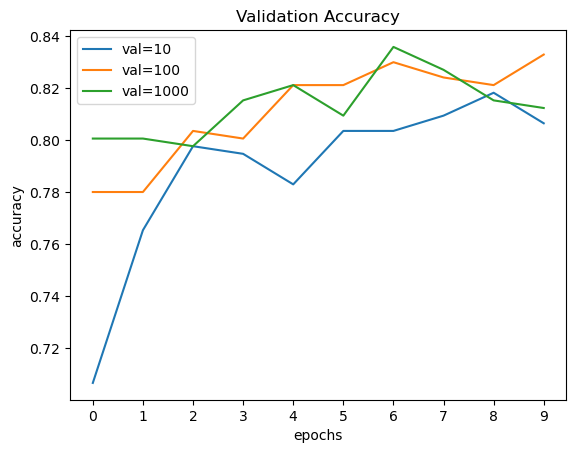

In [41]:
for size, model in scores.items():
#     plt.plot(model['accuracy'], label="train=%s" %size)
    plt.plot(model['val_accuracy'], label="val=%s" %size)
    plt.legend()

    
plt.title("Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.xticks(np.arange(10))
plt.show()

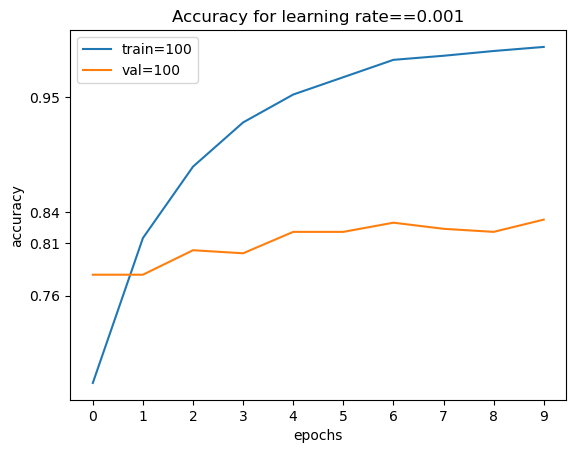

In [42]:
plt.plot(scores[100]['accuracy'], label="train=100")
plt.plot(scores[100]['val_accuracy'], label="val=100")

plt.title("Accuracy for learning rate==0.001")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.xticks(np.arange(10))
plt.yticks([0.76, 0.81, 0.84, 0.95])

plt.legend()
plt.show()

## Regularization & Dropout

Randomly hiding a part of input image to imporve the model performance accuracy.

In [43]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    # base model
    base_model = Xception(weights="imagenet",
                          include_top=False,
                          input_shape=(150, 150, 3)
                         )

    base_model.trainable = False 
    
    # ---------------x-x-x-x-----------
    # Model architechture
    inputs = keras.Input(shape=(150, 150, 3))                        
    base = base_model(inputs, training=False)                         
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # add dropout rate to the inner dense layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)                        
    model = keras.Model(inputs, outputs)
    
    # ---------------x-x-x-x-----------
    # Model training
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)            
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [44]:
# Tunning a inner layer size.
learning_rate = 0.001     # Best learning rate
size = 100                # Best inner dense nn size
scores = {}
for droprate in [0.0, 0.2, 0.5, 0.7]:
    print(f"---------{droprate}---------")
    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    model_hist = model.fit(train_df, 
                           epochs=30, 
                           validation_data=val_df
                          )
    scores[droprate] = model_hist.history
    print()
    print()

---------0.0---------
Epoch 1/30
96/96 [==============================] - 15s 130ms/step - loss: 0.9562 - accuracy: 0.6692 - val_loss: 0.6363 - val_accuracy: 0.7947
Epoch 2/30
96/96 [==============================] - 12s 124ms/step - loss: 0.5052 - accuracy: 0.8315 - val_loss: 0.5633 - val_accuracy: 0.8270
Epoch 3/30
96/96 [==============================] - 12s 122ms/step - loss: 0.3507 - accuracy: 0.8817 - val_loss: 0.5197 - val_accuracy: 0.8240
Epoch 4/30
96/96 [==============================] - 12s 123ms/step - loss: 0.2419 - accuracy: 0.9293 - val_loss: 0.6173 - val_accuracy: 0.7859
Epoch 5/30
96/96 [==============================] - 12s 122ms/step - loss: 0.1738 - accuracy: 0.9537 - val_loss: 0.5589 - val_accuracy: 0.8123
Epoch 6/30
96/96 [==============================] - 12s 123ms/step - loss: 0.1226 - accuracy: 0.9739 - val_loss: 0.5695 - val_accuracy: 0.8035
Epoch 7/30
96/96 [==============================] - 12s 121ms/step - loss: 0.0835 - accuracy: 0.9863 - val_loss: 0.5782 

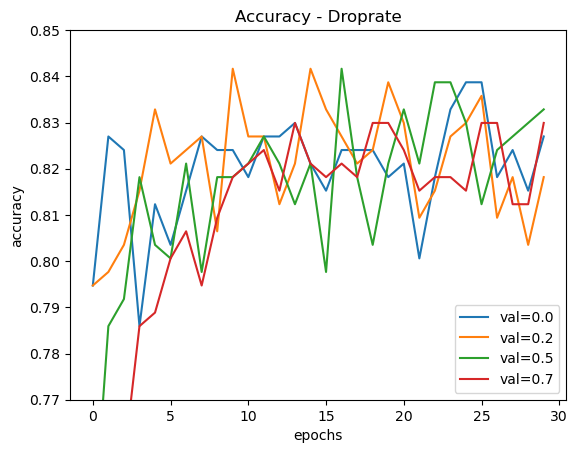

In [47]:
for droprate, model in scores.items():
#     plt.plot(model['accuracy'], label="train=%s" % droprate)
    plt.plot(model['val_accuracy'], label="val=%s" % droprate)
    plt.legend()

    
plt.title("Accuracy - Droprate")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.ylim(0.77, 0.85)
plt.show()

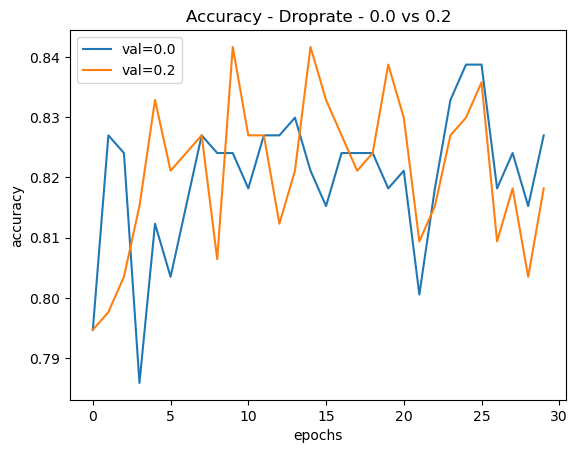

In [46]:
# plt.plot(scores[0.2]['accuracy'], label="train=0.2")

plt.plot(scores[0.0]['val_accuracy'], label="val=0.0")
plt.plot(scores[0.2]['val_accuracy'], label="val=0.2")


# plt.axhline(y=0.846, alpha=0.5, ls='--', lw=1, c="#000")

plt.title("Accuracy - Droprate - 0.0 vs 0.2")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()
plt.show()

## Data Augmentation

Data augmentation can be defined as the technique used to improve the diversity of the data by slightly modifying copies of already existing data or newly create synthetic data from the existing data.

Data Augmentation regularized the data and improves the model performance by preventing overfitting. 

Some of the techniques used for data augmentation are :

***1. Rotation ( range 0-360 degrees)***

***2. flipping (true or false for horizontal flip and vertical flip )***

***3. Shear range (image is shifted along x-axis or y-axis)***

***4. Brightness or Contrast range ( image is made lighter or darker)***

***5. Cropping ( resize the image )***

***6. Zoom ( image is scaled outward or inward )***

***8. Saturation ( depth or intensity of the image)***

In [48]:
# Data preparation using augmentation techniques.

# Create trainig image data generator with additional data agumentation techniques.
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,                                 # range(-10, 10)
    zoom_range=0.1,                                   # range(0.9, 1.1)
    vertical_flip=True
)

# Training dataset
train_df = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(150, 150),
    batch_size=32
)

# Create a validation image data generator without agumentation.
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

# Validation dataset
val_df = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [49]:
# Fitting a model with agumentated data.
learning_rate = 0.001     # Best learning rate
size = 100                # Best inner dense nn size
droprate = 0.2           
model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
model_hist = model.fit(train_df, 
                       epochs=50, 
                       validation_data=val_df
                      )

Epoch 1/50
96/96 [==============================] - 27s 257ms/step - loss: 1.2934 - accuracy: 0.5603 - val_loss: 0.8279 - val_accuracy: 0.7185
Epoch 2/50
96/96 [==============================] - 24s 250ms/step - loss: 0.9037 - accuracy: 0.6988 - val_loss: 0.7099 - val_accuracy: 0.7537
Epoch 3/50
96/96 [==============================] - 24s 248ms/step - loss: 0.7930 - accuracy: 0.7308 - val_loss: 0.6730 - val_accuracy: 0.7771
Epoch 4/50
96/96 [==============================] - 24s 248ms/step - loss: 0.6992 - accuracy: 0.7581 - val_loss: 0.6770 - val_accuracy: 0.7654
Epoch 5/50
96/96 [==============================] - 24s 252ms/step - loss: 0.6671 - accuracy: 0.7718 - val_loss: 0.6461 - val_accuracy: 0.7742
Epoch 6/50
96/96 [==============================] - 24s 249ms/step - loss: 0.6071 - accuracy: 0.7966 - val_loss: 0.6237 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] - 24s 250ms/step - loss: 0.5925 - accuracy: 0.8012 - val_loss: 0.5952 - val_accuracy: 0.8065

## Training a larger model
Train a model with image size of 299x299 instead of 150x150

In [53]:
# Larger model meaning large image size
# It will take more time to run as compare to previous model but will improve the model performance.

input_size = 299

# Create trainig image data generator with additional data agumentation techniques.
train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,                                 # range(-10, 10)
    zoom_range=0.1,                                   # range(0.9, 1.1)
    vertical_flip=True,
    horizontal_flip=True
)

# Training dataset with large image size (299x299)
train_df = train_gen.flow_from_directory(
    "./clothing-dataset-small/train",
    target_size=(input_size, input_size),
    batch_size=32
)

# Create a validation image data generator without agumentation
val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

# Validation dataset
val_df = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation",
    target_size=(input_size, input_size),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [54]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    # base model
    base_model = Xception(weights="imagenet",
                          include_top=False,
                          input_shape=(input_size, input_size, 3)
                         )

    base_model.trainable = False 
    
    # ---------------x-x-x-x-----------
    # Model architechture
    inputs = keras.Input(shape=(input_size, input_size, 3))                        
    base = base_model(inputs, training=False)                         
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    # add dropout rate to the inner dense layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)                        
    model = keras.Model(inputs, outputs)
    
    # ---------------x-x-x-x-----------
    # Model training
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)            
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics=['accuracy'])
    
    return model

In [55]:
# Checkpoint to save the best model
checkpoints = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [56]:
# Model training
learning_rate = 0.001     # Best learning rate
size = 100                # Best inner dense nn size
droprate = 0.2
model = make_model(input_size=input_size, learning_rate=learning_rate, size_inner=size, droprate=droprate)
model_hist = model.fit(train_df, 
                       epochs=50, 
                       validation_data=val_df,
                       callbacks=[checkpoints]
                      )

Epoch 1/50
96/96 [==============================] - 69s 684ms/step - loss: 1.1058 - accuracy: 0.6428 - val_loss: 0.5589 - val_accuracy: 0.8416
Epoch 2/50
96/96 [==============================] - 63s 650ms/step - loss: 0.6864 - accuracy: 0.7692 - val_loss: 0.5034 - val_accuracy: 0.8328
Epoch 3/50
96/96 [==============================] - 62s 648ms/step - loss: 0.5836 - accuracy: 0.8038 - val_loss: 0.4488 - val_accuracy: 0.8387
Epoch 4/50
96/96 [==============================] - 63s 658ms/step - loss: 0.5038 - accuracy: 0.8263 - val_loss: 0.4086 - val_accuracy: 0.8680
Epoch 5/50
96/96 [==============================] - 63s 652ms/step - loss: 0.4676 - accuracy: 0.8390 - val_loss: 0.4557 - val_accuracy: 0.8240
Epoch 6/50
96/96 [==============================] - 63s 659ms/step - loss: 0.4425 - accuracy: 0.8452 - val_loss: 0.4444 - val_accuracy: 0.8446
Epoch 7/50
96/96 [==============================] - 63s 650ms/step - loss: 0.4200 - accuracy: 0.8579 - val_loss: 0.4107 - val_accuracy: 0.8534

 ## Using a saved model

In [7]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [9]:
# Load the model 
model = keras.models.load_model("xception_v4_18_0.874.h5")

In [10]:
# Create a test image data generator
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

# Validation dataset
test_df = test_gen.flow_from_directory(
    "./clothing-dataset-small/test",
    target_size=(299, 299),
    batch_size=32
)

Found 372 images belonging to 10 classes.


In [12]:
model.evaluate(test_df)

12/12 [==============================] - 3s 202ms/step - loss: 0.2909 - accuracy: 0.8952


[0.2909180521965027, 0.8951612710952759]

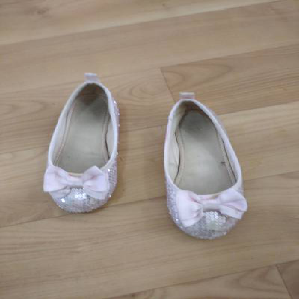

In [21]:
test_image_path = "./clothing-dataset-small/test/shoes/1e170a9f-9437-4eae-bd67-389c48b93ff9.jpg"
test_image = load_img(test_image_path, target_size=(299, 299))
test_image

In [34]:
# Convert image into a array
import numpy as np
from scipy.special import softmax

x = np.array(test_image)
x = np.array([x])
X = preprocess_input(x)
X.shape

(1, 299, 299, 3)

In [73]:
predictions = model.predict(X)

1/1 [==============================] - 0s 22ms/step


In [70]:
def make_predictions(predictions):
    classes = [
            'dress',
            'hat',
            'longsleeve',
            'outwear',
            'pants',
            'shirt',
            'shoes',
            'shorts',
            'skirt',
            't-shirt'
    ]
    output = []
    for preds in predictions:
        predict_proba = softmax(preds).tolist()
        max_proba_index = predict_proba.index(max(predict_proba))
        output.append(classes[max_proba_index])
        
    return output

In [74]:
make_predictions(predictions)

['shoes']

In [85]:
test_predictions = model.predict(test_df)

12/12 [==============================] - 3s 206ms/step


In [90]:
test_results = make_predictions(test_predictions)